In [28]:
import librosa
from transformers import HubertForCTC, Wav2Vec2Processor
import torch
import numpy as np
import matplotlib.pyplot as plt

Import the Wav2Vec Processor which takes in raw audio files and returns an audio embedding

In [29]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")

HuBERT is the LLM which processes the audio and transcribes the input embedding.

Note: `output_attentions` and `output_hidden_states` allows us to find what the model is attending to

In [30]:
model = HubertForCTC.from_pretrained(
    "facebook/hubert-large-ls960-ft",
    output_attentions=True,
    output_hidden_states=True
)

Some weights of the model checkpoint at facebook/hubert-large-ls960-ft were not used when initializing HubertForCTC: ['hubert.encoder.pos_conv_embed.conv.weight_g', 'hubert.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing HubertForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing HubertForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of HubertForCTC were not initialized from the model checkpoint at facebook/hubert-large-ls960-ft and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-

Load in Audio

In [31]:
speech, rate = librosa.load('./wav_data/Hillenbrand_wav_data/m11iy.wav', sr=16000)

In [32]:
# Embedding the Audio from raw to (n, 768 input vectors)
input_values = processor(speech, return_tensors="pt", padding="longest", sampling_rate=rate).input_values

logits = model(input_values).logits

In [33]:
# The attentions of the model
print("Attentions Shape", model(input_values).attentions[0].shape)
print("Hidden States", model(input_values).hidden_states[0].shape)

predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

num_heads = len(model(input_values).attentions)
print("num heads: ", num_heads)
print(transcription)

Attentions Shape torch.Size([1, 16, 38, 38])
Hidden States torch.Size([1, 38, 1024])
num heads:  24
['HEED']


/var/folders/4f/fs7d9wp53s7c7wgnrlnl7rmw0000gn/T/ipykernel_4348/1707982967.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(f"Encoder Idx {encoder_idx + 1}")


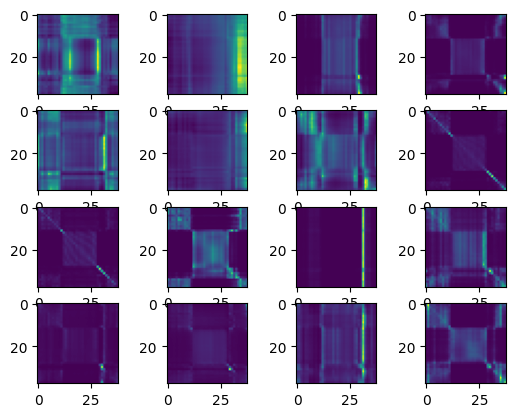

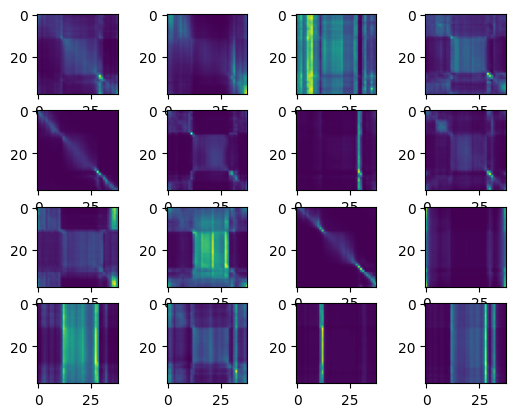

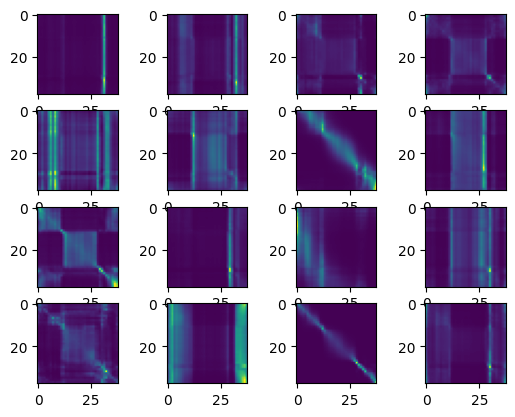

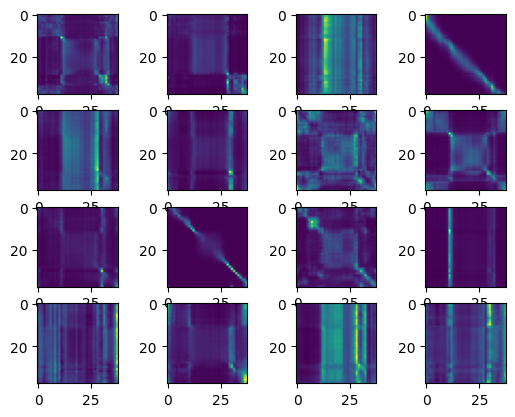

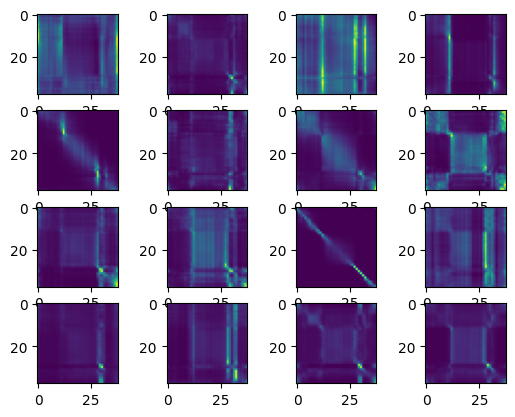

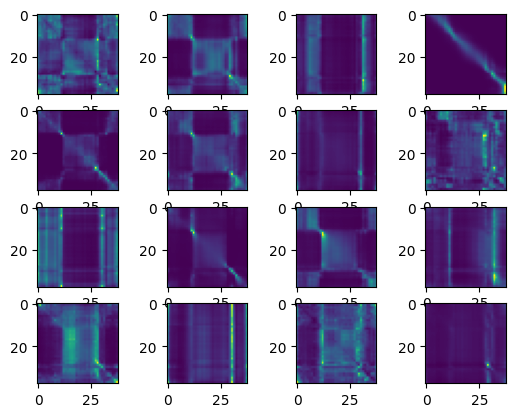

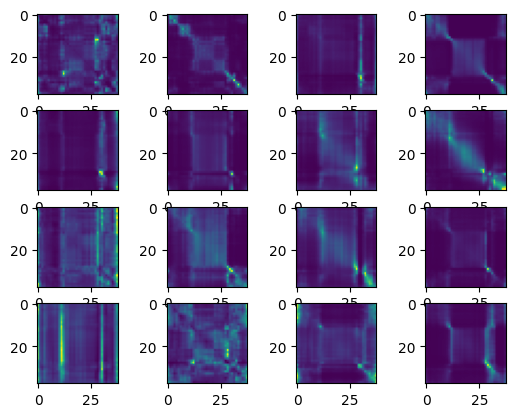

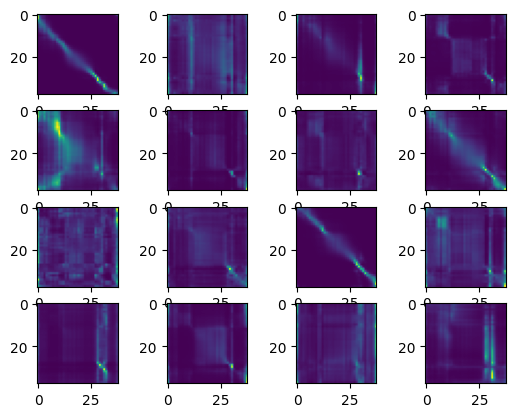

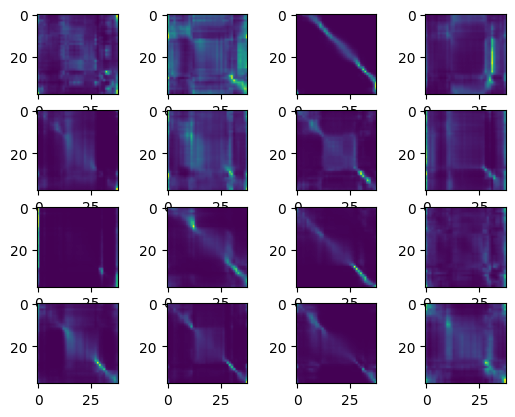

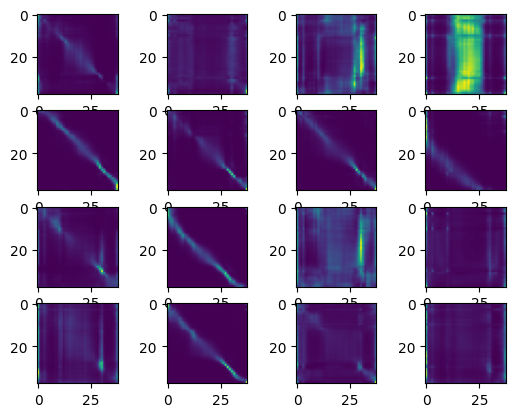

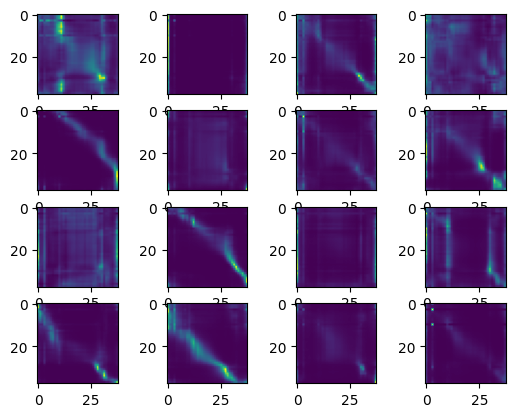

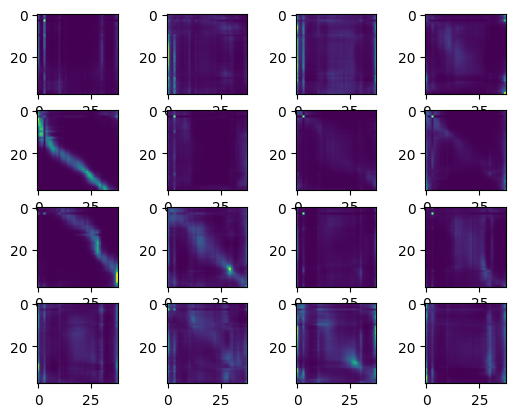

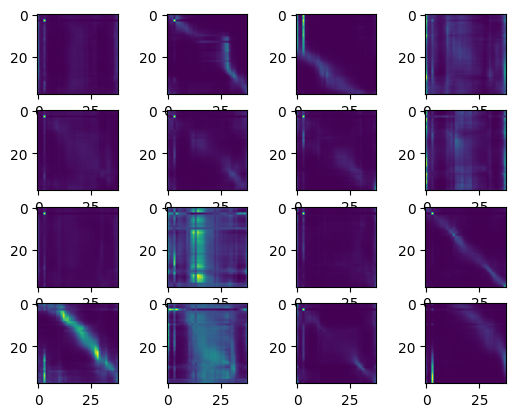

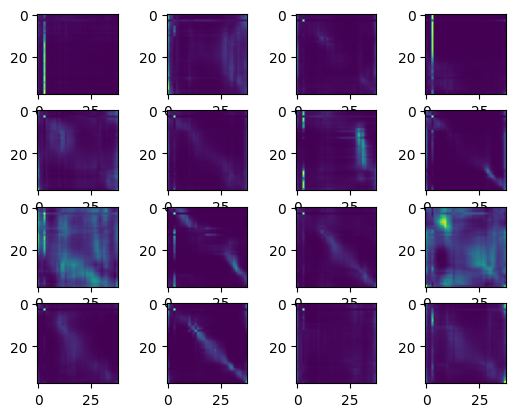

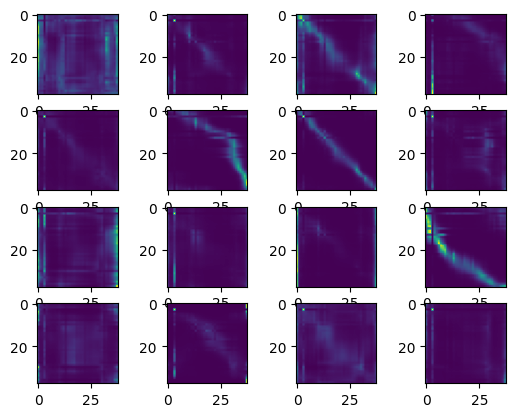

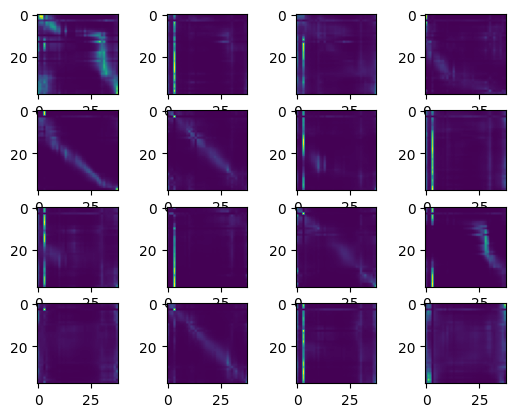

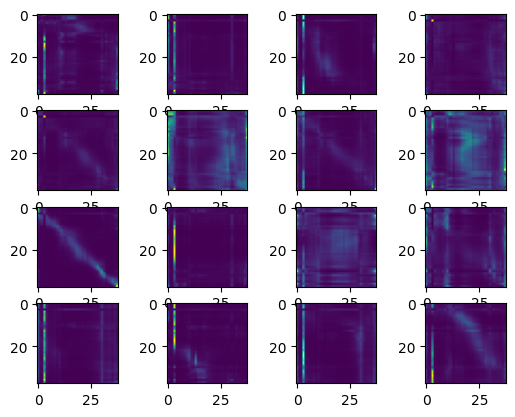

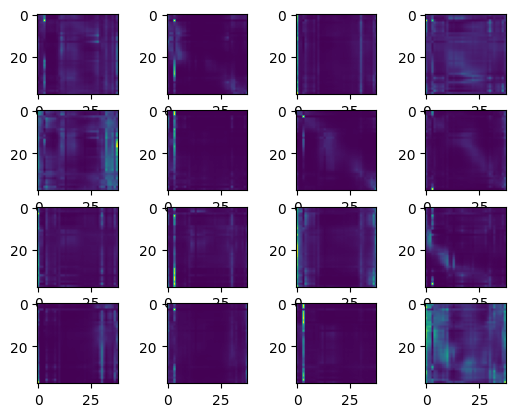

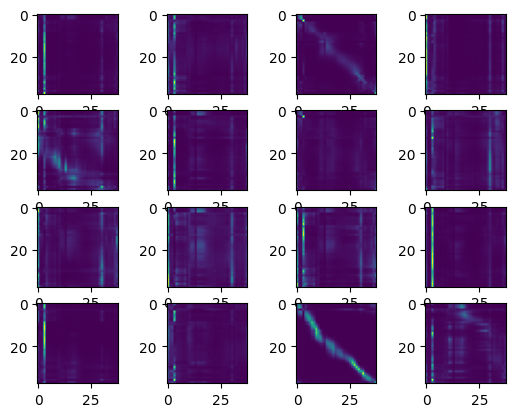

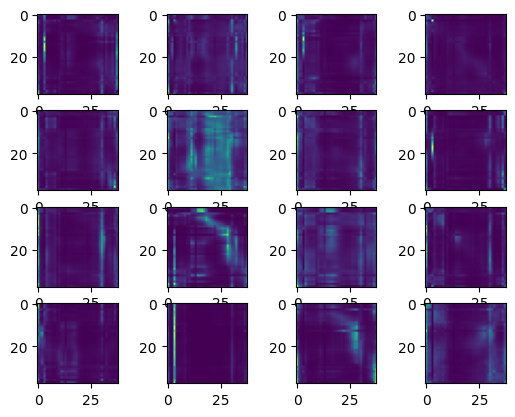

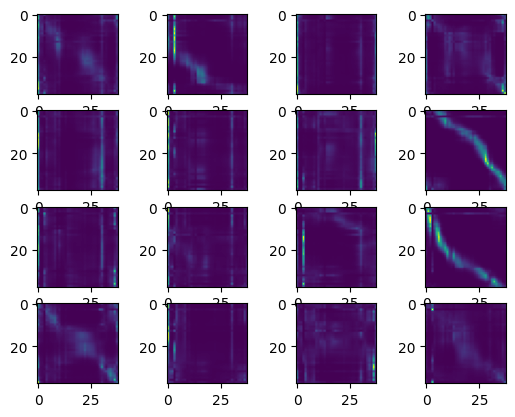

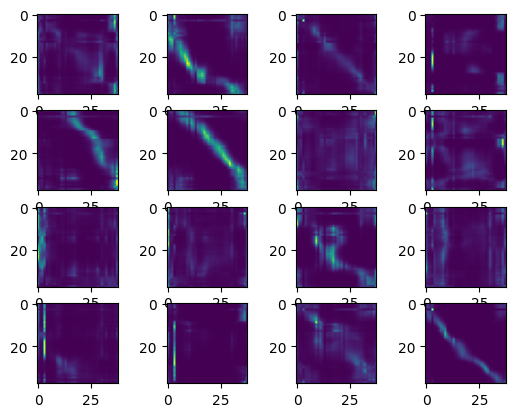

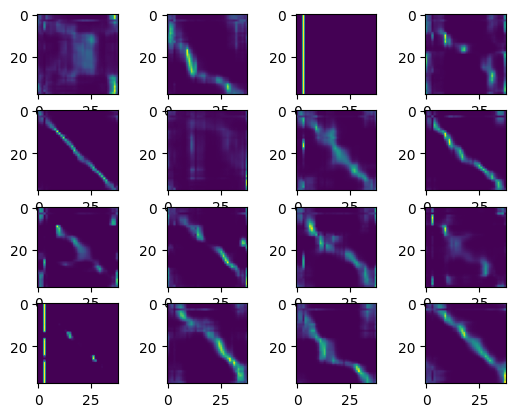

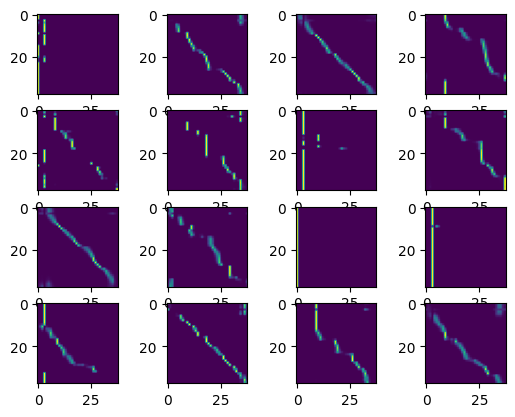

In [36]:
plt.close('all')
for encoder_idx in range(24):
    plt.figure(f"Encoder Idx {encoder_idx + 1}")
    for head_idx in range(16):
        plt.subplot(4,4,head_idx+1)
        plt.imshow(model(input_values).attentions[encoder_idx][0,head_idx,:,:].detach().numpy())

In [35]:
print(len(model(input_values).attentions[0][0]))

16
